<a href="https://colab.research.google.com/github/kosirobwada/KaggleDeepLearningBook/blob/main/2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()
X = digits.data
y = digits.target
print(X.shape, y.shape)

(1797, 64) (1797,)


In [8]:
import torch

X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.int64)

<ipython-input-8-c11247152114>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float32)
<ipython-input-8-c11247152114>:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y, dtype=torch.int64)


In [9]:
from torch import nn, optim

model = nn.Sequential(
    nn.Linear(64,32),
    nn.ReLU(),
    nn.Linear(32,16),
    nn.ReLU(),
    nn.Linear(16,10),
)

model.train()
lossfun = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [10]:
losses = []

for ep in range(100):
  optimizer.zero_grad()

  out = model(X)

  loss = lossfun(out, y)
  loss.backward()

  optimizer.step()

  losses.append(loss.item())

In [16]:
_, pred = torch.max(out, 1)
print((pred==y).sum().item() / len(y))


0.7284362826933779


Text(0, 0.5, 'loss')

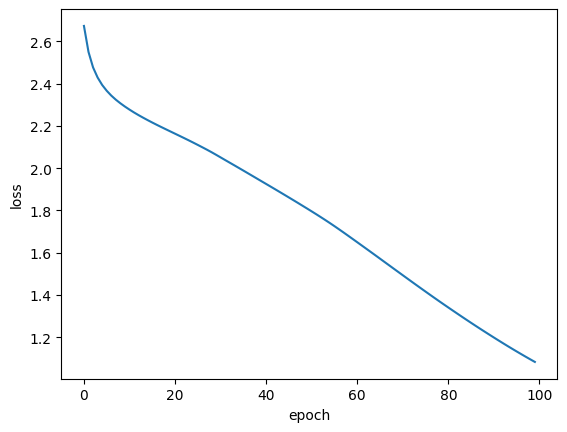

In [17]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('epoch')
plt.ylabel('loss')